UFCG/CEEI/DEE - Campus de Campina Grande - Disciplina: Controle Analógico

Segunda avaliação - Atividade 1 - Período: 2021.1 - Professor: Saulo O. D. Luiz

**Nome: Filipe Soares Donato**

**Matrícula: 120111402**

Caros alunos e alunas,

Crie uma cópia deste notebook do colab por meio do menu Arquivo / Salvar uma cópia no Drive, e inclua seu nome e matrícula no nome do notebook.

Os itens identificados como (Cálculos à mão) devem ser respondidos à mão no papel ou mesa digitalizadora. É possível anexar a imagem digitalizada neste notebook do colab, ou fazer upload de um pdf na atividade. Por favor não anexem jpg ou png.

Os demais itens podem ser respondidos na forma de código no Python, resultados de cálculos e simulações nas células identificadas como (#Resposta), e texto nas células identificadas como (Resposta) neste notebook do colab.

Realize upload do notebook como arquivo do seu Drive. Por favor, não faça upload do link do arquivo.

Boa sorte!

In [7]:
pip install control #Instalação da biblioteca de sistemas de controle do Python

1) O sistema de controle de posicionamento de um satélite é ilustrado na Figura 1, em que $\theta(s)$ é o ângulo do satélite, $R(s)$ é a entrada de referência, $J =1 \cdot 10^2 kg \cdot m^2$ é o momento de inércia do satélite, $p_d = 100$, $K_p$ e $K_d$ são parâmetros de um controlador.

(a) (0.5 ponto) (Cálculos à mão) Utilizando o diagrama de projeto, determine a função de transferência da referência para a saída.

(b) (0.5 ponto) (Cálculos à mão) Utilizando o diagrama de projeto, aloque os polos de malha fechada em -2+j3.464, e -2-j3.464.

(c) (0.5 ponto) (Cálculos à mão) Utilizando o diagrama de projeto, determine a função de transferência da referência para o erro, e determine se a saída rastreia a referência quando a referência é um degrau unitário.

(d) (0.5 ponto) Utilizando o diagrama de simulação: 

1.   Determine os polos  da malha fechada. Estes são iguais aos esperados no item (b)? Discuta o resultado.
2.   Apresente o mapa de polos e zeros da função de transferência da malha fechada.
3. Apresente os sinais da saída e do erro quando é aplicado o degrau unitário na entrada de referência.

(e) (0.5 ponto) Para a entrada de referência igual ao degrau unitário, apresente num mesmo gráfico o sinal da saída considerando o diagrama de simulação e o sinal da saída considerando o diagrama de projeto. A dinâmica da malha fechada considerando o diagrama de simulação é igual à dinâmica de malha fechada considerando o diagrama de projeto? Discuta.

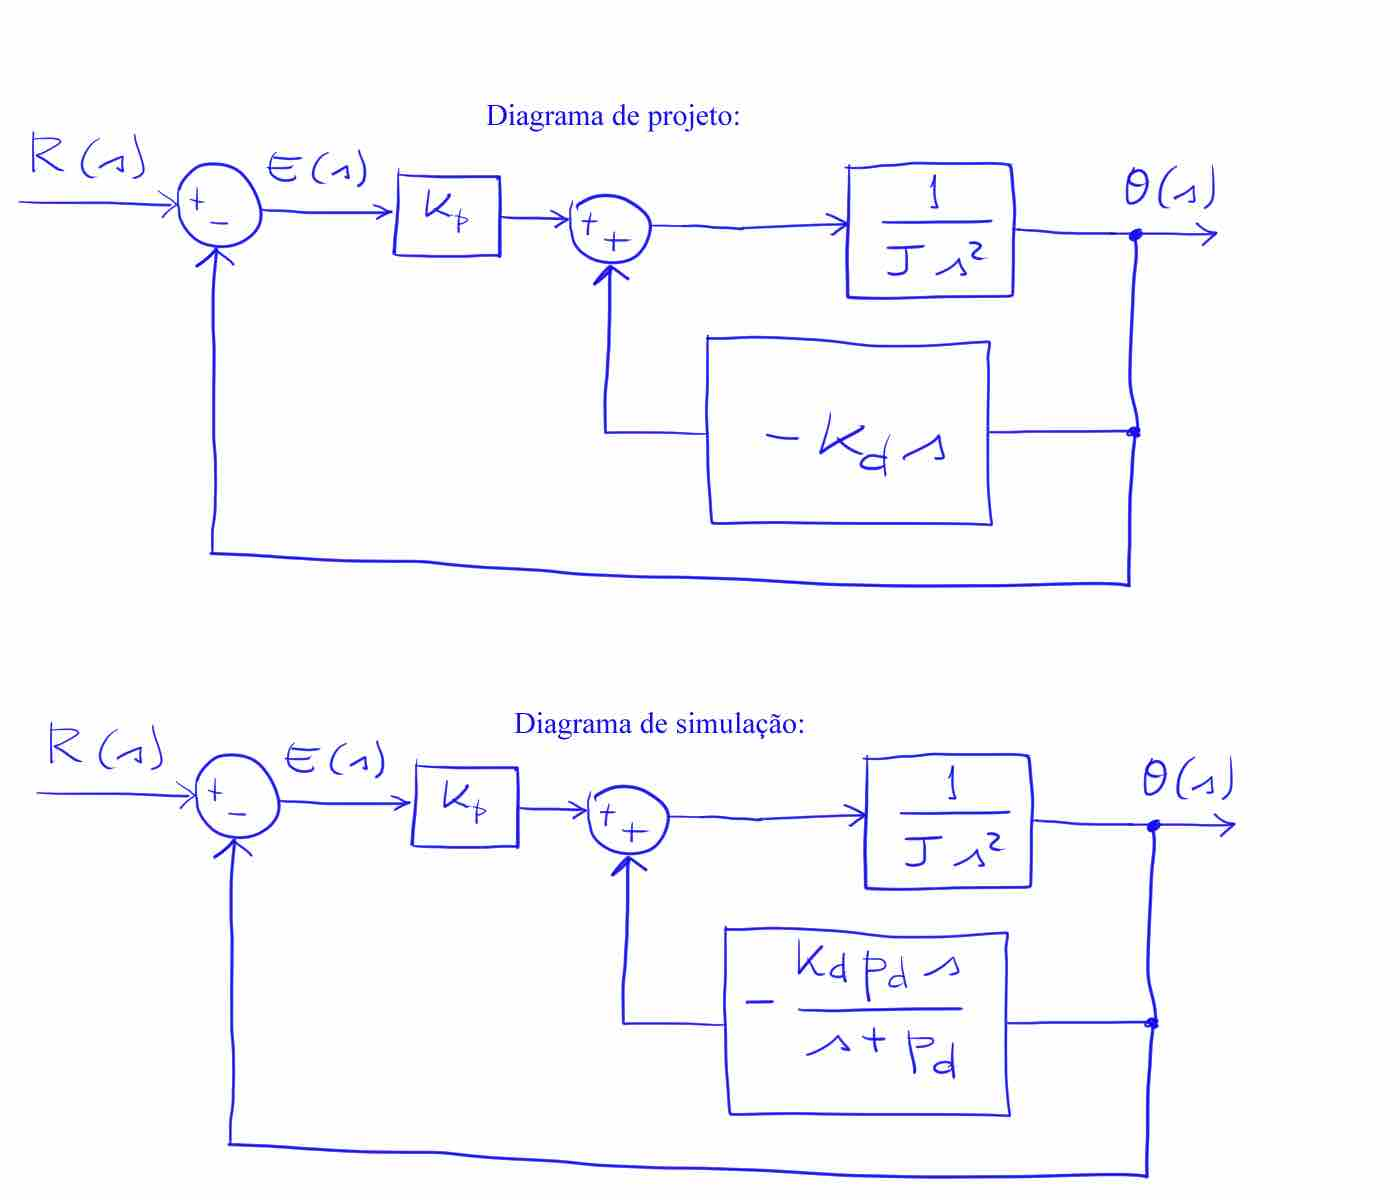
Figura 1: diagramas de bloco do sistema de controle de posicionamento de um satélite.

# 1)

Resposta

In [8]:
pip install sympy #Instalação da biblioteca padrão do Python para Matemática simbólica

A função de malha fechada será: 


            1.6e+05 s^2 + 1.664e+07 s + 6.4e+07
------------------------------------------------------------
100 s^4 + 2e+04 s^3 + 1.15e+06 s^2 + 1.656e+07 s + 6.384e+07



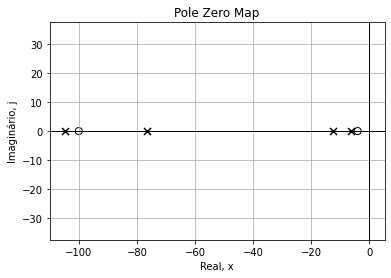


Os zeros são:  [-100.   -4.]

Os Polos são:  [-104.75706799  -76.34539266  -12.52448339   -6.37305597]

Os resultados são iguais aos esperados no ítem B?
Não, são diferentes.


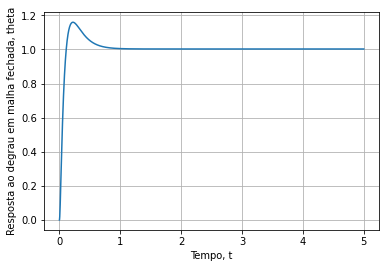

In [9]:
#Resposta
from numpy import *
from control.matlab import *
import matplotlib.pyplot as plt

s = tf('s')

J = 100.0
pd = 100.0
kp = 1599.9296
kd = -400

G = kp
A = 1/(J*s**2)
B = (-kd+pd*s)/(s + pd)
H = feedback(A*B, B, sign=1)

RY = feedback(G*H, 1, sign=-1)
print('A função de malha fechada será: \n')
print(RY)

plt.figure(1)
pzmap(RY)
plt.grid(True)
plt.xlabel('Real, x') 
plt.ylabel('Imaginário, j')
plt.show()

print('\nOs zeros são: ', zero(RY))
print('\nOs Polos são: ', pole(RY))


print('\nOs resultados são iguais aos esperados no ítem B?\nNão, são diferentes.')

y1,t1 = step(RY, T=5)
plt.figure(2)
plt.plot(t1,y1) 
plt.grid(True)
plt.xlabel('Tempo, t') 
plt.ylabel('Resposta ao degrau em malha fechada, theta')
plt.show()
